<a href="https://colab.research.google.com/github/Adarsh-gif-crypt/Echo-Echo/blob/main/PredictRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Checking and Importing Libraries

In [ ]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.0
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.4.2
bs4                           0.0.1
CacheC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

### Importing Data

In [ ]:
train = pd.read_csv('RELIANCE_Train.csv')
training_set = train.iloc[:,1:2].values
train

,Date,Open,High,Low,Close,Volume
0,25-05-2016,474.924988,476.399994,470.575012,475.600006,4224270
1,26-05-2016,475.000000,476.200012,472.049988,473.424988,6487202
2,27-05-2016,474.524994,488.450012,474.375000,487.350006,6126758
3,30-05-2016,488.200012,490.750000,482.500000,484.350006,4404182
4,31-05-2016,484.500000,486.500000,478.250000,478.924988,10666938
...,...,...,...,...,...,...
735,20-05-2019,1313.599976,1337.699951,1303.500000,1325.900024,12333937
736,21-05-2019,1332.199951,1367.000000,1330.050049,1339.800049,13872055
737,22-05-2019,1345.650024,1359.699951,1335.099976,1340.400024,11287400
738,23-05-2019,1372.000000,1392.000000,1325.000000,1333.900024,17722514


### Transforming Data

In [ ]:
tf = MinMaxScaler(feature_range = (0,1))
training_set_scaled = tf.fit_transform(training_set)
training_set_scaled

array([[0.00498559],
       [0.00506559],
       [0.00455902],
       [0.0191426 ],
       [0.01519676],
       [0.00930469],
       [0.00746507],
       [0.01039778],
       [0.010931  ],
       [0.00893143],
       [0.00933134],
       [0.01039778],
       [0.01786286],
       [0.01567667],
       [0.02156874],
       [0.02106217],
       [0.02159539],
       [0.01946252],
       [0.01687641],
       [0.02858056],
       [0.02372827],
       [0.02103552],
       [0.01301057],
       [0.        ],
       [0.0084782 ],
       [0.01146422],
       [0.01679642],
       [0.01719633],
       [0.01866269],
       [0.0243148 ],
       [0.02772742],
       [0.02479471],
       [0.02692759],
       [0.02919377],
       [0.03449932],
       [0.03604563],
       [0.03652554],
       [0.04665672],
       [0.03492588],
       [0.0423643 ],
       [0.04452384],
       [0.03492588],
       [0.03919164],
       [0.04399062],
       [0.04401727],
       [0.03969821],
       [0.04452384],
       [0.041

### Splitting and Reshaping Data

In [ ]:
X_train = []
Y_train = []

for i in range(60,740):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
    
X_train, Y_train = np.array(X_train),np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train,"\n=================\n",Y_train)

[[[0.00498559]
  [0.00506559]
  [0.00455902]
  ...
  [0.05105578]
  [0.04457715]
  [0.04025808]]

 [[0.00506559]
  [0.00455902]
  [0.0191426 ]
  ...
  [0.04457715]
  [0.04025808]
  [0.04132452]]

 [[0.00455902]
  [0.0191426 ]
  [0.01519676]
  ...
  [0.04025808]
  [0.04132452]
  [0.0381252 ]]

 ...

 [[0.83155598]
  [0.79742992]
  [0.80366857]
  ...
  [0.84968544]
  [0.89938149]
  [0.91921723]]

 [[0.79742992]
  [0.80366857]
  [0.81662583]
  ...
  [0.89938149]
  [0.91921723]
  [0.93356091]]

 [[0.80366857]
  [0.81662583]
  [0.82579718]
  ...
  [0.91921723]
  [0.93356091]
  [0.96166156]]] 
 [0.04132452 0.0381252  0.0381252  0.03796524 0.04303083 0.04127121
 0.0462568  0.06478618 0.06633253 0.05998721 0.04830968 0.04233765
 0.0434574  0.04401727 0.05038925 0.04793646 0.05732111 0.05678789
 0.06745228 0.07041167 0.07651701 0.07118482 0.07598379 0.07918311
 0.08686149 0.09411326 0.08926098 0.08238243 0.0679855  0.07811667
 0.08134268 0.08718141 0.08078277 0.0925136  0.0925136  0.07918311
 0

### Adding Layers

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the RNN to the training Data

In [ ]:
regressor.fit(X_train, Y_train, epochs = 200, batch_size = 32)

Epoch 1/200
22/22 [==============================] - 9s 112ms/step - loss: 0.0578
Epoch 2/200
22/22 [==============================] - 2s 113ms/step - loss: 0.0094
Epoch 3/200
22/22 [==============================] - 2s 110ms/step - loss: 0.0087
Epoch 4/200
22/22 [==============================] - 4s 162ms/step - loss: 0.0067
Epoch 5/200
22/22 [==============================] - 2s 110ms/step - loss: 0.0057
Epoch 6/200
22/22 [==============================] - 2s 110ms/step - loss: 0.0053
Epoch 7/200
22/22 [==============================] - 2s 108ms/step - loss: 0.0058
Epoch 8/200
22/22 [==============================] - 2s 110ms/step - loss: 0.0062
Epoch 9/200
22/22 [==============================] - 2s 107ms/step - loss: 0.0067
Epoch 10/200
22/22 [==============================] - 2s 111ms/step - loss: 0.0048
Epoch 11/200
22/22 [==============================] - 2s 110ms/step - loss: 0.0053
Epoch 12/200
22/22 [==============================] - 3s 115ms/step - loss: 0.0064
Epoch 13/200


### Getting real stock prices of 2017 (RELIANCE)

In [ ]:
dataset_test = pd.read_csv('RELIANCE_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Predicting Stock Price

In [ ]:
dataset_total = pd.concat((train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = tf.transform(inputs)
X_test = []
for i in range(60, 244):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = tf.inverse_transform(predicted_stock_price)


### Visualization of Result

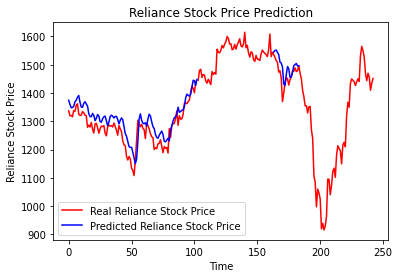

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Reliance Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Reliance Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()